In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class_Labels']
df = pd.read_csv('iris.data', names = columns)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class_Labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


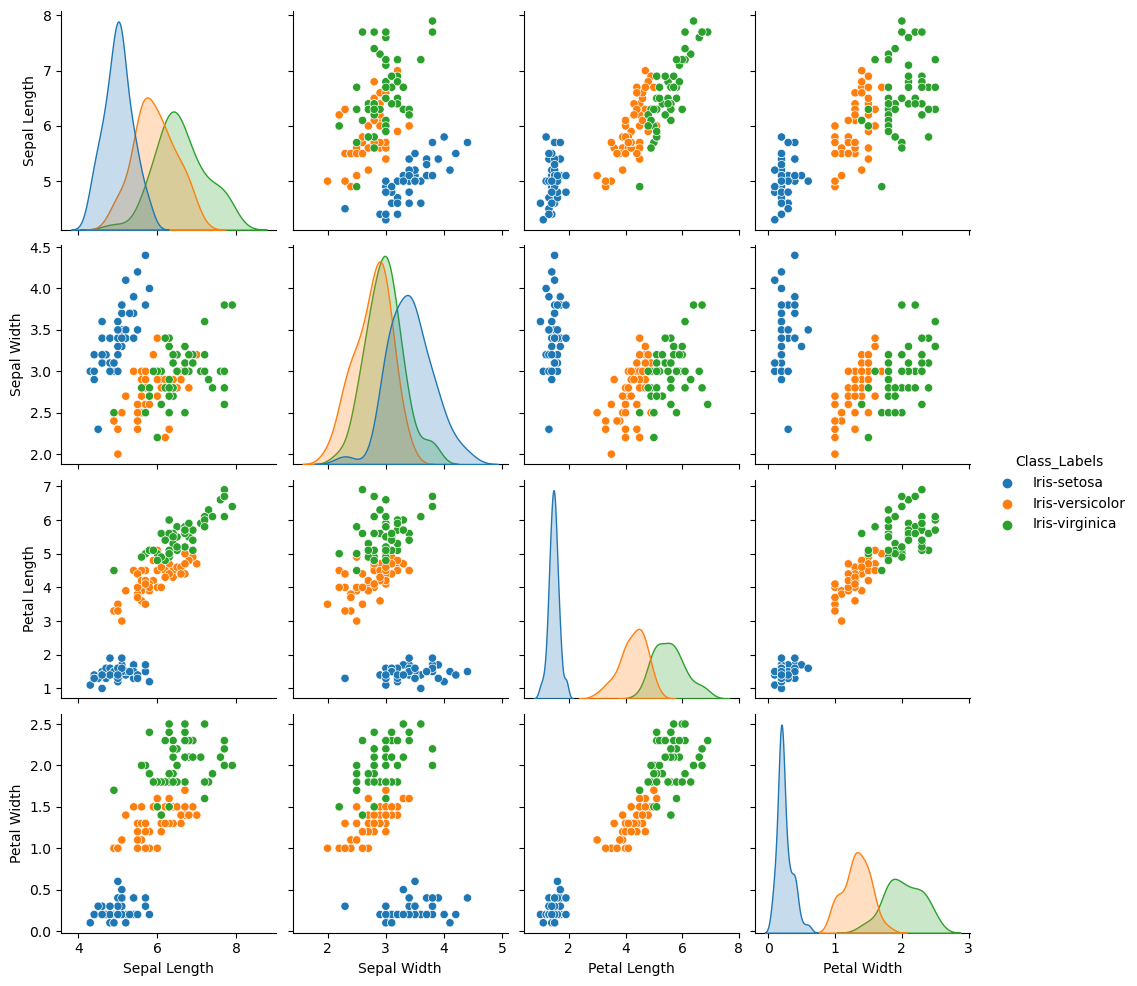

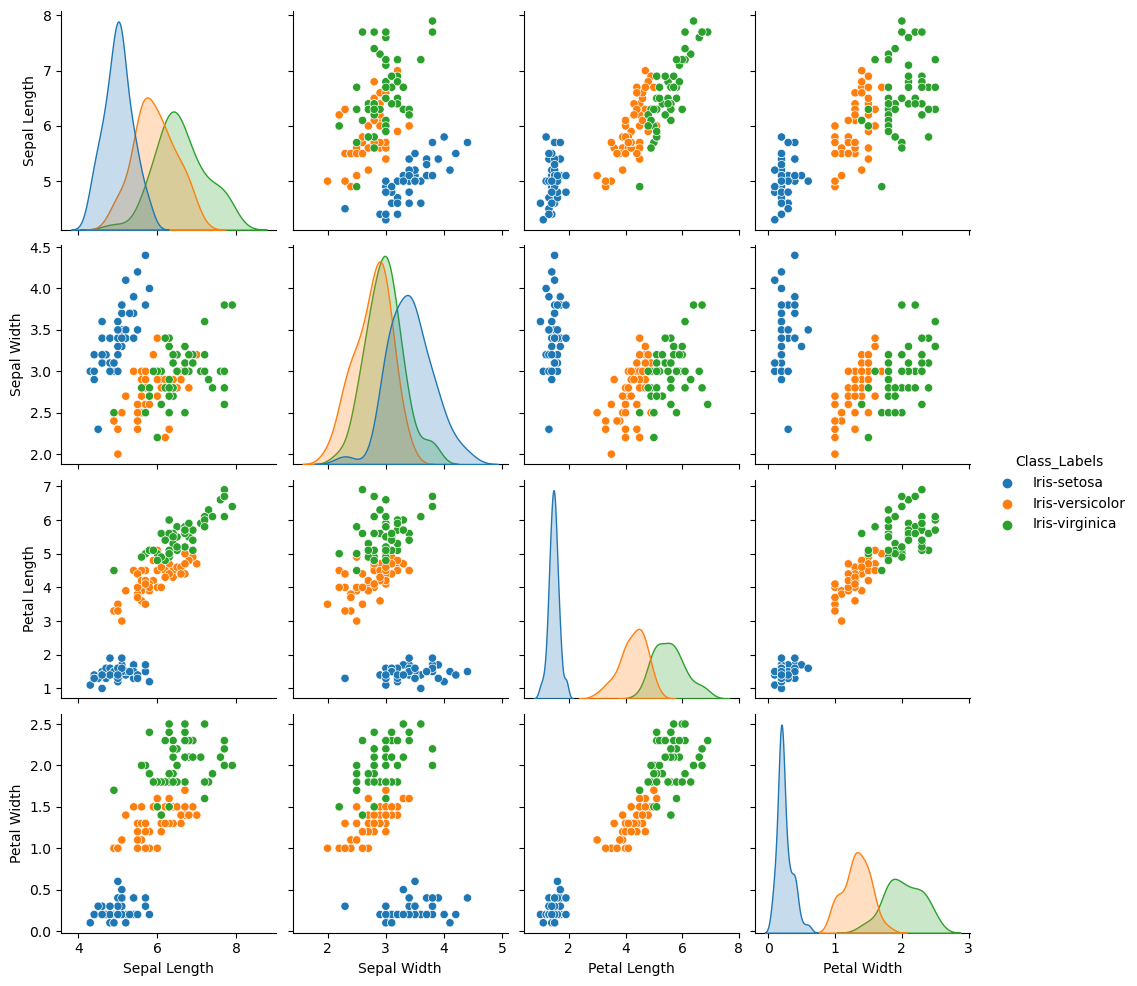

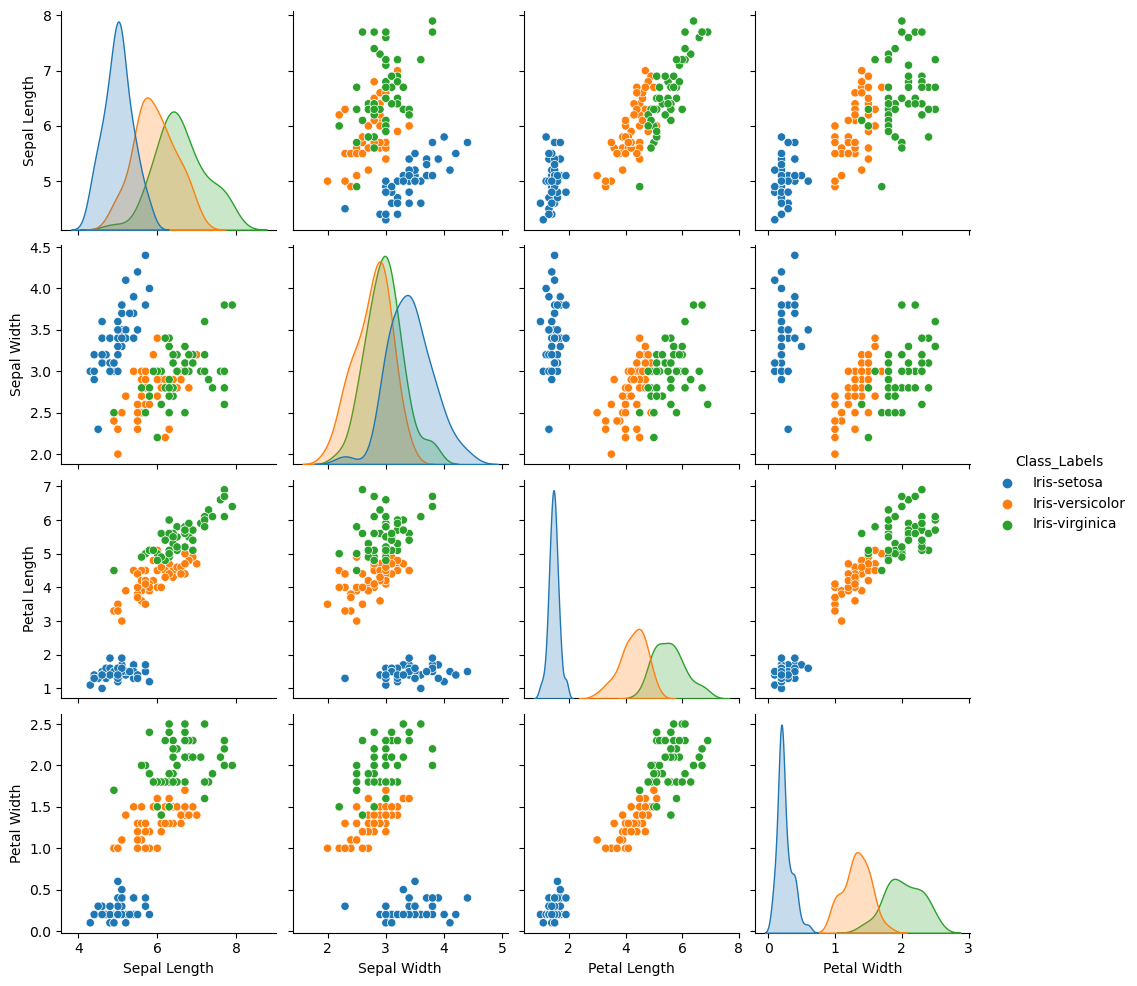

In [12]:
sns.pairplot(df, hue='Class_Labels')
plt.show()

In [13]:
# seperate features from target value
data = df.values
X = data[:,0:4] # all rows, columns 0-3 exclusive (input - features)
Y = data[:, 4] # all rows, column 4 (output - target variable - supervised learning, data is tagged)

In [16]:
# calculate the average of each feature for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
# 1D array containing avrg for each feature and each class

In [18]:
print(Y_Data)

[5.006     5.9360003 6.5880003 3.418     2.7700002 2.974     1.4640001
 4.26      5.552     0.244     1.3260001 2.026    ]


In [19]:
Y_Data_reshaped = Y_Data.reshape(4, 3)

In [20]:
print(Y_Data_reshaped)

[[5.006     5.9360003 6.5880003]
 [3.418     2.7700002 2.974    ]
 [1.4640001 4.26      5.552    ]
 [0.244     1.3260001 2.026    ]]


In [21]:
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)

In [26]:
print(Y_Data_reshaped)

[[5.006     3.418     1.4640001 0.244    ]
 [5.9360003 2.7700002 4.26      1.3260001]
 [6.5880003 2.974     5.552     2.026    ]]


In [22]:
X_axis = np.arange(len(columns)-1)
width = 0.25

In [27]:
print(Y_Data_reshaped[0])

[5.006     3.418     1.4640001 0.244    ]


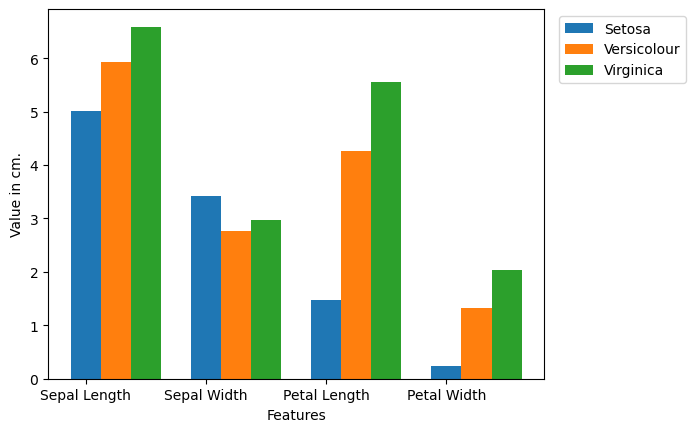

In [25]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [29]:
# split training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
# support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [31]:
# predict from test dataset
predictions = svn.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [34]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

In [35]:
# prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [36]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)